# Model Training and Validation

# Download Dependencies

In [1]:
!sudo apt-get install aria2c

[sudo] password for antonio: 


# Setting up the datasets

In this phase, the environment setup is performed, which involves defining the relevant links for downloading the datasets and creating the destination folder for storing the data.

In [ ]:
from utils.prepare_datasets import * 

In [ ]:
# You can follow this tutorial for more information - https://www.tutorialspoint.com/google_colab/index.htm
# You can also see this video - https://www.youtube.com/watch?v=inN8seMm7UI

# Mount your Drive - After doing this step, your Google Drive folders are accessible from Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
if not os.path.exists("datasets"):
    os.makedirs("datasets")
os.chdir("datasets")
if not os.path.exists("foggia"):
    os.makedirs("foggia")
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [ ]:
#Choose dataset to download
datasets = {
    "foggia": { #use gdown
        "videos":"https://drive.google.com/file/d/1tEz2wVQjPp1MjVHZLa-Z3uyVBnwljgGF/view?usp=sharing",
        "annotations":"https://drive.google.com/file/d/123AcAQCldRNE6iKpXuCaVtsaR3uHIOeN/view?usp=sharing"
    },
    "kmu": {#use aria2c
        #"reference":"https://cvpr.kmu.ac.kr/Dataset/Dataset.htm",
        "short-distance-flame":"\"https://cvpr.kmu.ac.kr/Dataset/Indoor_outdoor(short_distance)flame.zip\"",
        "short-distance-smoke":"\"https://cvpr.kmu.ac.kr/Dataset/Indoor_outdoor(short_distance)smoke.zip\"",
        "wildfire-smoke":"https://cvpr.kmu.ac.kr/Dataset/Wildfire_smoke.zip",
        "others":"https://cvpr.kmu.ac.kr/Dataset/Smoke_flame_like_moving_object.zip",
    },
    "firesense": { #use aria2c
        "fire":"https://zenodo.org/record/836749/files/fire_videos.1406.zip?download=1",
        "smoke":"https://zenodo.org/record/836749/files/smoke_videos.1407.zip?download=1"
    },
    "dfire": { #use gdown
        "smoke": "https://drive.google.com/file/d/1yvNRGvPtRINO7iDnaqxr90wXGPDObVHS/view?usp=drive_link"
    }
}

selected_dataset = "foggia"

# Download of ONFIRE dataset

In this phase, the provided dataset for the OnFire contest is downloaded.


In [ ]:
download_google_file(datasets[selected_dataset]["videos"], f"datasets/{selected_dataset}/VIDEOS.zip")
!unzip datasets/{selected_dataset}/VIDEOS.zip -d datasets/{selected_dataset}/VIDEOS
!rm datasets/{selected_dataset}/VIDEOS.zip

In [ ]:
download_google_file(datasets[selected_dataset]["annotations"], f"datasets/{selected_dataset}/GT.zip")
!unzip datasets/{selected_dataset}/GT.zip -d datasets/{selected_dataset}
!mkdir -p datasets/{selected_dataset}/GT/TRAINING_SET
!mv datasets/{selected_dataset}/GT_TRAINING_SET_CL0 datasets/{selected_dataset}/GT/TRAINING_SET/0
!mv datasets/{selected_dataset}/GT_TRAINING_SET_CL1 datasets/{selected_dataset}/GT/TRAINING_SET/1
!rm datasets/{selected_dataset}/GT.zip

In [ ]:
download_google_file("https://drive.google.com/file/d/1rXMCtpus2i2UDdSBD9RwWAxnT0wrrXOk/view?usp=sharing", "test_code.zip")
!unzip test_code.zip

### Create Training Set e Test Set

The partitioning of the initial dataset into Training Set and Test Set is a critical step in the machine learning workflow as it allows for the evaluation of the performance of the model on unseen data. The Test Set is used to assess the generalization ability of the model and to estimate its performance on new, unseen data.

Maintaining the a priori probability of the labels in the Test Set is important because it ensures that the Test Set is representative of the actual distribution of the labels in the dataset. This is particularly important in cases where the dataset is imbalanced, meaning that some classes have fewer samples than others. In such cases, randomly partitioning the data into Training Set and Test Set can result in a Test Set that does not reflect the true distribution of the labels, leading to biased evaluation metrics.

In addition, it is important to extract a Test Set on which the model is not trained, as this ensures that the model is evaluated on truly unseen data. If the Test Set is used for training, the model may overfit to the Test Set and perform poorly on new data.

In [ ]:
selected_dataset= "foggia"
new_dataset = "foggia-unbalanced"
prob_a_priori = True
randomness = 9823460 
random.seed(randomness,1) #for unbalanced test-set -> 9823460
folder_dataset = "datasets/"+selected_dataset
destination_folder = "datasets/"+new_dataset
copy_folder(folder_dataset, destination_folder)
if os.path.exists(os.path.join(destination_folder, "FRAMES")):
    shutil.rmtree(os.path.join(destination_folder, "FRAMES"))
create_test_set(destination_folder, 0.2, prob_a_priori)
videos_path = f"TRAINING_SET"
frames_path = f"FRAMES"
extract_frames(new_dataset,videos_path, frames_path)

# ONFIRE Training Set Analysis

In this phase, we perform the analysis of the Training Set extracted from the dataset provided for the ONFIRE contest involves examining the diversity of the data in the Training Set. One approach to accomplish this is by using an open-source software tool called "Video Duplicate Finder".

The Video Duplicate Finder software is capable of detecting and identifying duplicate video files in a given dataset. In the context of the ONFIRE contest, it can be used to identify if there are any duplicate or highly similar videos in the Training Set. This analysis can help ensure that the Training Set contains diverse and representative examples of the data, which is important for training machine learning models that can generalize well to new, unseen data.

The process of analyzing the Training Set with Video Duplicate Finder involves running the software on the Training Set and examining the output to identify any duplicate or highly similar videos. Once the duplicates are identified, the next step is to extract the relevant information from the output file produced by the software. This can be done using the pandas library in Python, which allows for efficient data manipulation and analysis.

In [ ]:
from utils.dataset_analysis import *
import pandas as pd
#json file is the path of the json file for analysis 
json_file = "datasets/foggia-unbalanced/VIDEOS/TRAINING_SET/training_set_ONFIRE.json"
clusters_data = show_cluster_dataframe(json_file, verbose = True)
datasets_dict = create_dict_from_json(clusters_data)

Found 140 videos inside clusters


,,,VideoName,VideoNumber
GroupId,Dataset,Class,,
05b688ad-5b2a-40ab-acc6-fa4d77890726,foggia-unbalanced,1,"Video187.mp4, Video17.mp4, Video128.mp4, Video242.mp4",4
13216d7e-e1d3-49b0-b8a0-6fcc3189c35d,foggia-unbalanced,0,"Video53.mp4, Video29.mp4, Video61.mp4, Video21.mp4, Video14.mp4, Video1.mp4, Video41.mp4, Video2.mp4",8
1fafcf79-facf-417b-aa48-652a075fe1c3,foggia-unbalanced,1,"Video201.mp4, Video129.mp4",2
2d5282df-79b7-45ad-93c6-580783b2a239,foggia-unbalanced,1,"Video61.mp4, Video90.mp4, Video226.mp4, Video102.mp4",4
372de876-258c-4ef1-a513-01c537d6f08b,foggia-unbalanced,1,"Video6.mp4, Video12.mp4",2
49a88da6-cf55-437a-bebd-af446e42fb11,foggia-unbalanced,1,"Video137.mp4, Video212.mp4",2
4b340260-165b-456f-9c6f-a33c53613dcf,foggia-unbalanced,1,"Video172.mp4, Video51.mp4",2
648b233c-7a30-4d13-8671-5fb21802baca,foggia-unbalanced,0,"Video67.mp4, Video76.mp4",2
6588bd32-18c0-4cc0-9e5b-ddb59444da8e,foggia-unbalanced,1,"Video60.mp4, Video43.mp4",2


In [ ]:
num_cluster = clusters_data.shape[0] - 1
print("Number of cluster in the Training Set: ", num_cluster)
# Visualizzare il dizionario risultante
for dataset, classes_dict in datasets_dict.items():
    print(f"{dataset}:")
    for classe, videos in classes_dict.items():
        print(f"    {classe}: {len(videos)} video")
        print(f"        {videos}")

Number of cluster in the Training Set:  19
foggia-unbalanced:
    1: 104 video
        ['Video187.mp4', 'Video17.mp4', 'Video128.mp4', 'Video242.mp4', 'Video201.mp4', 'Video129.mp4', 'Video61.mp4', 'Video90.mp4', 'Video226.mp4', 'Video102.mp4', 'Video6.mp4', 'Video12.mp4', 'Video137.mp4', 'Video212.mp4', 'Video172.mp4', 'Video51.mp4', 'Video60.mp4', 'Video43.mp4', 'Video59.mp4', 'Video165.mp4', 'Video179.mp4', 'Video240.mp4', 'Video24.mp4', 'Video56.mp4', 'Video8.mp4', 'Video237.mp4', 'Video255.mp4', 'Video53.mp4', 'Video97.mp4', 'Video169.mp4', 'Video108.mp4', 'Video33.mp4', 'Video252.mp4', 'Video7.mp4', 'Video227.mp4', 'Video46.mp4', 'Video35.mp4', 'Video164.mp4', 'Video175.mp4', 'Video248.mp4', 'Video105.mp4', 'Video93.mp4', 'Video159.mp4', 'Video76.mp4', 'Video182.mp4', 'Video190.mp4', 'Video225.mp4', 'Video20.mp4', 'Video144.mp4', 'Video143.mp4', 'Video168.mp4', 'Video217.mp4', 'Video45.mp4', 'Video124.mp4', 'Video42.mp4', 'Video139.mp4', 'Video155.mp4', 'Video25.mp4', 'Video44.mp

According to the analysis, it was found that the Training Set contains 140 videos that can be grouped into 19 clusters. Among these clusters, only one cluster is balanced, with 37 positive and 27 negative videos, while the majority of the other clusters are positively labeled. This indicates that without extending the dataset, the machine learning model may not be able to generalize well, as it will likely associate the positive label with the context of the video, rather than with the presence of fire or smoke.

# Download other useful datasets

In the context of the OnFire contest, extending the dataset can be beneficial for several reasons. Firstly, the original dataset provided for the contest is relatively limited and may not cover all possible variations of the data that the model may encounter in the real world. By extending the dataset, we can increase the model's generalization ability and improve its performance on real-world data.

Secondly, the original dataset is imbalanced, meaning that some classes have fewer examples than others. This can lead to biased performance metrics, as the model may perform well on the majority class and poorly on the minority class. By extending the dataset and adding more examples of the minority class, we can balance the classes and improve the model's performance on all classes.

Finally, overfitting can also be a concern in the OnFire contest, as the models are trained on a relatively small dataset. Overfitting occurs when the model fits too well to the training data and performs poorly on new, unseen data. By extending the dataset and increasing the variety of the training data, we can reduce overfitting and improve the model's ability to generalize to new data.

In summary, extending the dataset in the context of the OnFire contest can help improve the model's generalization ability, balance the classes, and reduce overfitting. This can ultimately lead to better performance and more accurate predictions in real-world scenarios.

In [ ]:
from gdown import download_folder as download_google_folder

def download_dataset_aria2c(ds_dict, dataset):
    for (folder, link) in ds_dict[dataset].items():
        !aria2c -c -d datasets/{dataset}/{folder} {link}

def download_dataset_git(ds_dict, dataset):
    for (folder, repo) in ds_dict[dataset].items():
        !git clone {repo} datasets/{dataset}/{folder}

def download_dataset_gdown(ds_dict, dataset):
    for (folder, link) in ds_dict[dataset].items():
        download_google_folder(url=link, output=f"datasets/{dataset}/{folder}", remaining_ok=True)

### KMU

In [ ]:
import shutil
download_dataset_aria2c(datasets,"kmu")
shutil.move("datasets/kmu/","datasets/kmu_original/")

In [ ]:
!unzip datasets/kmu_original/others/Smoke_flame_like_moving_object.zip -d datasets/kmu_original/others
!rm datasets/kmu_original/others/Smoke_flame_like_moving_object.zip
!unzip datasets/kmu_original/short-distance-flame/Indoor_outdoor\(short_distance\)flame.zip -d datasets/kmu_original/short-distance-flame
!rm datasets/kmu_original/short-distance-flame/Indoor_outdoor\(short_distance\)flame.zip
!unzip datasets/kmu_original/short-distance-smoke/Indoor_outdoor\(short_distance\)smoke.zip -d datasets/kmu_original/short-distance-smoke
!rm datasets/kmu_original/short-distance-smoke/Indoor_outdoor\(short_distance\)smoke.zip
!unzip datasets/kmu_original/wildfire-smoke/Wildfire_smoke.zip -d datasets/kmu_original/wildfire-smoke
!rm datasets/kmu_original/wildfire-smoke/Wildfire_smoke.zip

### Firesense

In [ ]:
download_dataset_aria2c(datasets, "firesense")
shutil.move("datasets/firesense/","datasets/firesense_original/")

In [ ]:
!unzip datasets/firesense_original/fire/fire_videos.1406.zip -d datasets/firesense_original/fire
!rm datasets/firesense_original/fire/fire_videos.1406.zip
!unzip datasets/firesense_original/smoke/smoke_videos.1407.zip -d datasets/firesense_original/smoke
!rm datasets/firesense_original/smoke/smoke_videos.1407.zip

### DFire

In [ ]:
from utils.prepare_datasets import download_google_file
import shutil
name = "dfire"
download_google_file(datasets[name]["smoke"], f"datasets/dfire.zip")
!unzip datasets/{name} -d datasets 
!rm datasets/dfire.zip

shutil.move("datasets/dfire", "datasets/dfire_original")


# Demo visualization

Now we try to visualize some images from the dataset to check that everything is loaded correctly. We are also going to evaluate some augmentation techniques that we can use to improve the generalization of the model. In particular, we considered the following transformations:

- Baseline: horizontal flips and random rotations
- Color manipulation: brightness, contrast, saturation, hue, gamma, tone curve
- Environment manipulation: fog, snow, rain, frost, shadows, sun flare
- Noise: gaussian noise, gaussian blur, multiplicative noise, ISO noise

After some experiments, we made the following choices:
- Some color manipulations were too much aggressive and they were discarded to avoid overfitting. 
- Most of the environment manipulations were discarded because they are not useful for our application or because they produced unrealistic images. The only environment manipulation that we kept is the sun flare, because it is realistic given the dataset. The fog was discarded because it could be easily confused with smoke.
- The ISO noise was discarded because most of the images are already taken from camera footage, so they already have some noise. Also it was too much aggressive.

Based on these considerations, we produced the following augmentation pipeline:
- A sun flare is added with probability 0.2
- An horizontal flip is applied with probability 0.5
- A random rotation is applied with probability 0.75
- A color manipulation is applied with probability 0.75. The color manipulation is chosen randomly from the following list:
    - Gamma
    - Brightness and Contrast
- A noise manipulation is applied with probability 0.75. The noise manipulation is chosen randomly from the following list:
    - MultiplicativeNoise
    - MotionBlur



Some notes on the implementation:
- The function get_dataset_training_test_modes() loads the same dataset used for training and validation, but with different transformations. In particular, the training set is augmented with random transformations, while the validation set is not augmented. Futhermore, the the frames are extracted randomly from the videos in the training set, while they are extracted sequentially from the videos in the validation set.
- A custom collate function is used to create the batches. In particular, the frames of different videos are stacked together to form a tensor of shape (batch_size, n_frames, C, W, H). The labels are stacked together to form a tensor of shape (batch_size, n_frames, label_size). The labels are repeated along the n_frames dimension to match the number of frames.





In [ ]:
import albumentations
import cv2
from utils.dataset import get_dataset_training_test_modes
from torch.utils.data import DataLoader
from utils.training import collate_function_videos_to_images

def demo_visualization(selected_dataset):
    from torchvision.utils import make_grid
    import matplotlib.pyplot as plt
    
    dataset_train_mode, dataset_test_mode = get_dataset_training_test_modes(selected_dataset, preprocessing=preprocess, augmentation=augmentation)
    
    dataloader_train = DataLoader(dataset_train_mode, batch_size=1, shuffle=False, num_workers=8, pin_memory=True, collate_fn=collate_function_videos_to_images(3))
    dataloader_test = DataLoader(dataset_test_mode, batch_size=1, shuffle=False, num_workers=8, pin_memory=True, collate_fn=collate_function_videos_to_images(3))
    
    counter = 0
    dataset_test_iterator = iter(dataloader_test)
    
    for X, y in dataloader_train:
        if counter < 10:
            X_test, y_test = next(dataset_test_iterator)
            counter += 1
            continue
        if counter > 20:
            break
        #print(type(X))
        #print(X.shape)
        #print(make_grid(X).shape)
        plt.figure()
        plt.imshow(make_grid(X).numpy().transpose((1, 2, 0)))
        plt.title(y)
        plt.show()
        X_test, y_test = next(dataset_test_iterator)
        plt.figure()
        plt.imshow(make_grid(X_test).numpy().transpose((1, 2, 0)))
        plt.title(y_test)
        plt.show()
        counter += 1

preprocess = albumentations.Compose([
                        albumentations.Resize(232,232,interpolation=cv2.INTER_LINEAR),
                        albumentations.CenterCrop(224,224),
                        albumentations.ToFloat(max_value=255.0)
                    ])
    
# Augmentation
augmentation = albumentations.Compose(
    [
    # Condizioni ambientali
    #albumentations.RandomSnow(p=1.), #sporca troppo le immagini, non c'entra nulla col problema
    albumentations.RandomSunFlare(src_radius=10,num_flare_circles_lower=3, num_flare_circles_upper=7,p=0.20),
    #albumentations.RandomFog(fog_coef_lower=0.3,fog_coef_upper=0.35,p=1.), #rischioso, facile da confondere con il fumo
    #albumentations.RandomRain(p=1.),
    #albumentations.RandomShadow(p=1., num_shadows_lower=1, num_shadows_upper=1, shadow_dimension=5), #nosense
        
    # Baseline
    albumentations.HorizontalFlip(p=0.5),
    albumentations.Rotate(limit=7, p=0.75),
    
    # Manipolazione dei colori
    #albumentations.HueSaturationValue(sat_shift_limit=20,hue_shift_limit=20,val_shift_limit=20,p=1.), #non mi piace, altera troppo i colori
    #albumentations.Equalize(p=1.), #interessante per preprocessare i dati
    
    albumentations.OneOf([
        #albumentations.RandomToneCurve(scale=0.2,p=1.), #ok
        albumentations.RandomGamma(p=1.), #ok,
        albumentations.RandomBrightnessContrast(contrast_limit=0.30,brightness_limit=0.15,p=1.), #può andare ma certe volte le immagini sono troppo scure,
    ],p=0.75),
    
    #Rumori
    albumentations.OneOf([
        #albumentations.OneOf([
            albumentations.MultiplicativeNoise(p=1.), #ok
            albumentations.MotionBlur(p=1.), #ok
        #],p=1.),
        #albumentations.ISONoise(p=1.), #ok
    ],p=0.75),
    #albumentations.GlassBlur(p=1.), #ok, aggressivo
    #albumentations.CLAHE(p=1.), #ok #sporca troppo
    
    
    ],
    p=1.)

demo_visualization("foggia-unbalanced-ext")

# Dataset Analysis 

### Dependencies


In [ ]:
import shutil
import os
from utils.prepare_datasets import *
from utils.dataset_analysis import *

In this phase, we are preparing the structure of additional datasets that may be useful for evaluating the possibility of including their videos in the Training Set to extend its size.

### DFIRE for Analysis


In [ ]:

src_path = "datasets/dfire_original"
dst_path = "datasets/analysis/dfire"
shutil.copytree(src_path,dst_path)

### KMU for Analysis


In [ ]:

selected_dataset = "kmu"
os.makedirs("datasets/analysis/"+selected_dataset +"/VIDEOS")
os.makedirs("datasets/analysis/"+selected_dataset +"/VIDEOS/TRAINING_SET")
os.makedirs("datasets/analysis/"+selected_dataset +"/VIDEOS/TRAINING_SET/0")
os.makedirs("datasets/analysis/"+selected_dataset +"/VIDEOS/TRAINING_SET/1")

In [ ]:
source_dir = "datasets/kmu_original/wildfire-smoke"
destination_dir = "datasets/analysis/kmu/VIDEOS/TRAINING_SET/1"
copy_content(source_dir, destination_dir)

source_dir = "datasets/kmu_original/short-distance-smoke"
copy_content(source_dir, destination_dir)

source_dir = "datasets/kmu_original/short-distance-flame"
copy_content(source_dir, destination_dir)

source_dir = "datasets/kmu_original/others"
destination_dir = "datasets/analysis/kmu/VIDEOS/TRAINING_SET/0"
copy_content(source_dir, destination_dir)

### Fisense for Analysis


In [ ]:

selected_dataset = "firesense"
os.makedirs("datasets/analysis/"+selected_dataset +"/VIDEOS")
os.makedirs("datasets/analysis/"+selected_dataset +"/VIDEOS/TRAINING_SET")
os.makedirs("datasets/analysis/"+selected_dataset +"/VIDEOS/TRAINING_SET/0")
os.makedirs("datasets/analysis/"+selected_dataset +"/VIDEOS/TRAINING_SET/1")

In [ ]:
source_dir = "datasets/firesense_original/smoke/pos/"
destination_dir = "datasets/analysis/firesense/VIDEOS/TRAINING_SET/1"
copy_content(source_dir, destination_dir)

source_dir = "datasets/firesense_original/fire/pos/"
copy_content(source_dir, destination_dir)

source_dir = "datasets/firesense_original/smoke/neg/"
destination_dir = "datasets/analysis/firesense/VIDEOS/TRAINING_SET/0"
copy_content(source_dir, destination_dir)

source_dir = "datasets/firesense_original/fire/neg/"
copy_content(source_dir, destination_dir)

### Result Analysis from .json Video Duplicate Finder


The goal is to identify and evaluate the suitability of these datasets for inclusion in the Training Set, based on factors such as their relevance to the problem domain, the diversity of the videos they contain, and the quality and accuracy of their labels.

In this phase, we have conducted an analysis of the datasets identified for inclusion in the Training Set, with a focus on avoiding the creation of new clusters. The goal is to extend the dataset in a way that does not create new clusters but instead adds a component of heterogeneity.

To achieve this, we have carefully examined the videos in the identified datasets and selected those that are most relevant to the problem domain and that exhibit sufficient diversity in terms of their content and context. We have also ensured that the videos do not introduce new clusters that would complicate the training and evaluation of the machine learning model.

In [ ]:
from utils.dataset_analysis import *
import pandas as pd

json_file = "datasets/dfire_firesense_kmu_foggia.json"#"datasets/dfire_firesense_kmu_foggia.json"
clusters_data = show_cluster_dataframe(json_file, verbose = False)
datasets_dict = create_dict_from_json(clusters_data)

In [ ]:
# Visualizzare il dizionario risultante
for dataset, classes_dict in datasets_dict.items():
    print(f"{dataset}:")
    for classe, videos in classes_dict.items():
        print(f"    {classe}: {len(videos)} video")
        print(f"        {videos}")

### Create Potentialy Extention Structure


In [ ]:
selected_dataset = "potentialy_extension"
dataset_folder = "datasets/" + selected_dataset

# Crea le cartelle solo se non esistono già
if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder + "/VIDEOS/TRAINING_SET/0")
    os.makedirs(dataset_folder + "/VIDEOS/TRAINING_SET/1")
    os.makedirs(dataset_folder + "/GT/TRAINING_SET/0")
    os.makedirs(dataset_folder + "/GT/TRAINING_SET/1")

### Create Dictonary


In this phase, we have stored in a dictionary only the videos that, based on our analysis, would guarantee an increase in the heterogeneity of the Training Set.

By storing only the selected videos in the dictionary, we can ensure that the Training Set is extended in a way that promotes increased heterogeneity, which can enhance the model's ability to generalize to new, unseen data.


In [ ]:
selected_datasets = ["kmu", "dfire", "firesense"]
dict_complete = create_videos_dict(selected_datasets )
diff_dict=substract_dict(dict_complete,datasets_dict)
#for dataset, classes_dict in dict_complete.items():
#    print(f"{dataset}:")
#    for classe, videos in classes_dict.items():
#        print(f"    {classe}: {len(videos)} video")
#        print(f"        {videos}")

### Create Extension Dataset


In [ ]:
from utils.prepare_datasets import *
folder_dataset = "datasets/foggia-unbalanced"
destination_folder= "datasets/foggia-unbalanced-ext"
copy_folder(folder_dataset, destination_folder)

### Extension Dataset


In [ ]:
from utils.prepare_datasets import *

In [ ]:

selected_dataset = "kmu_original"
key_dataset  = "kmu"
folder_path = "datasets/"+selected_dataset
false = "others"
fire = "flame"
smoke = "smoke"
new_dataset = "potentialy_extension"
dest_path = "datasets/"+new_dataset
file_dict = []
# Verifica se la chiave [0] esiste in diff_dict[key_dataset]["0"]
if "0" in diff_dict[key_dataset]:
    if "1" in diff_dict[key_dataset]:
        file_dict = diff_dict[key_dataset]["0"]+diff_dict[key_dataset]["1"]
        # La lista diff_dict[key_dataset]["0"] non è vuota
        # Esegui le operazioni necessarie
    
    else:
        # La lista diff_dict[key_dataset]["0"] è vuota
        # Esegui le operazioni necessarie
        file_dict = diff_dict[key_dataset]["0"]
else:
    # La chiave [0] non esiste in diff_dict[key_dataset]["0"]
    # Esegui le operazioni necessarie
    file_dict = diff_dict[key_dataset]["1"]
copy_videos_and_rtf_files(folder_path,false,smoke,fire,file_dict,dest_path)

In [ ]:
selected_dataset = "dfire_original"
key_dataset  = "dfire"
folder_path = "datasets/"+selected_dataset+"/VIDEOS/TRAINING_SET"
false = "0"
fire = "1"
smoke = "smoke"
new_dataset = "potentialy_extension"
dest_path = "datasets/"+new_dataset
file_dict = []
# Verifica se la chiave [0] esiste in diff_dict[key_dataset]["0"]
if "0" in diff_dict[key_dataset]:
    if "1" in diff_dict[key_dataset]:
        file_dict = diff_dict[key_dataset]["0"]+diff_dict[key_dataset]["1"]
        # La lista diff_dict[key_dataset]["0"] non è vuota
        # Esegui le operazioni necessarie
    
    else:
        # La lista diff_dict[key_dataset]["0"] è vuota
        # Esegui le operazioni necessarie
        file_dict = diff_dict[key_dataset]["0"]
else:
    # La chiave [0] non esiste in diff_dict[key_dataset]["0"]
    # Esegui le operazioni necessarie
    file_dict = diff_dict[key_dataset]["1"]
copy_videos_and_rtf_files(folder_path,false,smoke,fire,file_dict,dest_path)

In [ ]:
selected_dataset = "firesense_original"
key_dataset  = "firesense"
folder_path = "datasets/"+selected_dataset+"/fire"
false = "neg"
fire = "pos"
smoke = "smoke"
new_dataset = "potentialy_extension"
dest_path = "datasets/"+new_dataset
file_dict = []
# Verifica se la chiave [0] esiste in diff_dict[key_dataset]["0"]
if "0" in diff_dict[key_dataset]:
    if "0" in diff_dict[key_dataset]:
        file_dict = diff_dict[key_dataset]["1"]+diff_dict[key_dataset]["1"]
        # La lista diff_dict[key_dataset]["0"] non è vuota
        # Esegui le operazioni necessarie
    
    else:
        # La lista diff_dict[key_dataset]["0"] è vuota
        # Esegui le operazioni necessarie
        file_dict = diff_dict[key_dataset]["0"]
else:
    # La chiave [0] non esiste in diff_dict[key_dataset]["0"]
    # Esegui le operazioni necessarie
    file_dict = diff_dict[key_dataset]["1"]
copy_videos_and_rtf_files(folder_path,false,smoke,fire,file_dict,dest_path)

In [ ]:
selected_dataset = "firesense_original"
key_dataset  = "firesense"
folder_path = "datasets/"+selected_dataset+"/smoke"
false = "neg"
fire = "fire"
smoke = "pos"
new_dataset = "potentialy_extension"
dest_path = "datasets/"+new_dataset
file_dict = []
# Verifica se la chiave [0] esiste in diff_dict[key_dataset]["0"]
if "0" in diff_dict[key_dataset]:
    if "0" in diff_dict[key_dataset]:
        file_dict = diff_dict[key_dataset]["1"]+diff_dict[key_dataset]["1"]
        # La lista diff_dict[key_dataset]["0"] non è vuota
        # Esegui le operazioni necessarie
    
    else:
        # La lista diff_dict[key_dataset]["0"] è vuota
        # Esegui le operazioni necessarie
        file_dict = diff_dict[key_dataset]["0"]
else:
    # La chiave [0] non esiste in diff_dict[key_dataset]["0"]
    # Esegui le operazioni necessarie
    file_dict = diff_dict[key_dataset]["1"]

copy_videos_and_rtf_files(folder_path,false,smoke,fire,file_dict,dest_path)

In [ ]:
folder_path = "datasets/potentialy_extension"
convert_avi_to_mp4(folder_path)
!rm datasets/potentialy_extension/VIDEOS/TRAINING_SET/0/FP18.mp4
!rm datasets/potentialy_extension/GT/TRAINING_SET/0/FP18.rtf


In [ ]:
new_dataset="potentialy_extension"
videos_path = f"TRAINING_SET"
frames_path = f"FRAMES"
extract_frames(new_dataset,videos_path, frames_path)

In [ ]:
src_root = "datasets/potentialy_extension/"
dst = "datasets/foggia-unbalanced-ext/"
shutil.copytree(src_root, dst, dirs_exist_ok=True)

# Training
In this section, we are going to train the proposed models. Three main ideas were considered:
- A 2D CNN trained to classify each frame independently. The models considered ResNet50, MobileNetV3-Small, MobileNetV3-Large, YOLOv8n-cls, kutralnet (a custom model used for fire and smoke detection). We applied transfer learning to all the models. The models were trained on the ONFIRE dataset and on the extended dataset. All of this models were trained on a binary classification problem using a softmax as the output activation function and the cross entropy loss function.
- Training the same models as before, but for a multilabel classification problem. Here we tried to predict the presence of fire and smoke in each frame, as this could lead to a better extraction of features for the two problems. The models were trained on the ONFIRE dataset and on the extended dataset. All of this models were trained using a sigmoid as the output activation function and the binary cross entropy loss function.
- A model composed of a CNN and a LSTM. The CNN is used to extract features from each frame, while the LSTM is used to extract features from the sequence of frames. The CNN we adapted was MobileNetV3-Large. One limitation related on CNN architecture is that CNNs may not be well-suited for capturing temporal dynamics in video data, which is critical for detecting fire and smoke in real-time. Additionally, CNNs may not be able to effectively capture long-term dependencies in the input data, which can result in suboptimal performance. To address these limitations, a CNN+LSTM architecture can be used, which can effectively capture both spatial and temporal features in video data. The LSTM component can capture long-term dependencies in the input data, enabling the model to better capture temporal dynamics and make more accurate predictions. This approach can be particularly useful in multiclass classification tasks, where the model needs to distinguish between multiple types of fire or smoke.





However, there are also potential drawbacks to using a CNN+LSTM architecture. One drawback is that the addition of the LSTM component can significantly increase the computational complexity of the model, making it less suitable for real-time applications on resource-constrained devices. Additionally, the increased complexity can lead to overfitting, especially when the size of the dataset is limited.

For time constraints, we have tested the CNN+LSTM architecture using a sequence of three frames per second. This approach has consequences, considering that the state-of-the-art suggests using temporal sequences of at least 16 frames. This may be a future evolution of the model. However, for the current implementation, we have used the MobileNet v3 Large CNN architecture, which has achieved the best performance. Specifically, we have used the last three layers of the network, including the classification layers, as well as the 16th and 15th layers as feature extractors.

The use of a three-frame-per-second sequence may result in suboptimal performance compared to using longer temporal sequences. This is because the model has less temporal information to work with, which can lead to lower accuracy in detecting fire and smoke. 

### Train code for CNN model

In [2]:
import os
from utils.training import train_model_k_fold
from utils.dataset import get_dataset_training_test_modes
from utils.training import collate_function_videos_to_images
from utils.models import get_config
import importlib

selected_model = "YOLOv8n-cls-bin"
experiment_name = "experiments/YOLOv8n-cls-bin-stratified-kfold-sgd/foggia-unbalanced-ext"
selected_dataset = "foggia-unbalanced-ext"
stratified_kfold = True


batch_size = 32 #64
epochs = 1000
early_stopping_patience = 80



model_config = get_config(selected_model)
model_module = importlib.import_module(model_config['module_name'])
ModelClass = getattr(model_module, model_config['class_name'])


preprocessing = model_config['preprocess']
augmentation = model_config['augmentation']
normalization = model_config['normalization']
loss_function = model_config['criterion']
OptimizerClass = model_config['optimizer']
optimizer_params = model_config['optimizer_params']
SchedulerClass = model_config['scheduler']
scheduler_params = model_config['scheduler_params']


if not os.path.exists(experiment_name):
    os.makedirs(experiment_name)

dataset_train_mode, dataset_test_mode = get_dataset_training_test_modes(selected_dataset, preprocessing, augmentation, normalization)

print(f"Training model {ModelClass.__name__} on dataset {selected_dataset}\n\twith optimizer {OptimizerClass} with params {optimizer_params}\n\twith loss function {loss_function}\nwith scheduler {SchedulerClass} with params {scheduler_params}")

train_model_k_fold(dataset_train_mode, dataset_test_mode, ModelClass, OptimizerClass,
                   optimizer_params, loss_function, epochs, batch_size,
                   early_stopping_patience, collate_function_videos_to_images(3),
                   experiment_name, num_classes = 2,  n_folds = 10, debug_prints = False, SchedulerClass=SchedulerClass, scheduler_params=scheduler_params if SchedulerClass is not None else {}, stratified_kfold=stratified_kfold)

# train_model_k_fold(selected_dataset, ModelClass, OptimizerClass,
#                    optimizer_params, loss_function, epochs, batch_size,
#                    early_stopping_patience, collate_function_videos_to_images,
#                    experiment_name, num_classes = 2,  n_folds = 6, debug_prints = False)

Training model yolov8n_cls on dataset foggia-unbalanced-ext
	with optimizer <class 'torch.optim.sgd.SGD'> with params {'lr': 0.001, 'momentum': 0.9, 'weight_decay': 0}
	with loss function CrossEntropyLoss()
with scheduler None with params {'mode': 'min', 'factor': 0.31622776601683794, 'patience': 25, 'min_lr': 1e-06}
Fold 8:


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6664 | train_acc: 0.6268 | val_loss: 0.6884 | val_acc: 0.6000
- saved best model: val_loss = 0.6884462833404541 val_accuracy = 0.6000000238418579
Epoch: 2 | train_loss: 0.6603 | train_acc: 0.6292 | val_loss: 0.6807 | val_acc: 0.6333
- saved best model: val_loss = 0.6807184815406799 val_accuracy = 0.6333333253860474
Generalization gap is increased:  0.020441830158233643 Decreasing early stopping counter:  79
Epoch: 3 | train_loss: 0.6574 | train_acc: 0.6245 | val_loss: 0.6704 | val_acc: 0.6333
- saved best model: val_loss = 0.6703931093215942 val_accuracy = 0.6333333253860474
Generalization gap is increased:  0.012999514738718632 Decreasing early stopping counter:  79
Epoch: 4 | train_loss: 0.6532 | train_acc: 0.6316 | val_loss: 0.6616 | val_acc: 0.6333
- saved best model: val_loss = 0.6615526080131531 val_accuracy = 0.6333333253860474
Generalization gap is increased:  0.008377763960096596 Decreasing early stopping counter:  79
Epoch: 5 | train_loss: 0.6443 | tr

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6932 | train_acc: 0.5018 | val_loss: 0.6877 | val_acc: 0.6111
- saved best model: val_loss = 0.6877015233039856 val_accuracy = 0.6111111044883728
Epoch: 2 | train_loss: 0.6623 | train_acc: 0.6279 | val_loss: 0.6790 | val_acc: 0.6333
- saved best model: val_loss = 0.6790243983268738 val_accuracy = 0.6333333253860474
Generalization gap is increased:  0.016708016395568848 Decreasing early stopping counter:  79
Epoch: 3 | train_loss: 0.6547 | train_acc: 0.6340 | val_loss: 0.6691 | val_acc: 0.6333
- saved best model: val_loss = 0.6691468358039856 val_accuracy = 0.6333333253860474
Generalization gap is increased:  0.014460404713948605 Decreasing early stopping counter:  79
Epoch: 4 | train_loss: 0.6525 | train_acc: 0.6303 | val_loss: 0.6621 | val_acc: 0.6333
- saved best model: val_loss = 0.6621262431144714 val_accuracy = 0.6333333253860474
Generalization gap is increased:  0.009660124778747559 Decreasing early stopping counter:  79
Epoch: 5 | train_loss: 0.6481 | tr

### Train code for CNN+LSTM model

In [ ]:
import os
from utils.training import train_model_k_fold
from utils.dataset import get_dataset_training_test_modes
import torch
from utils.models import get_config
import importlib
from torch.utils.data import default_collate

selected_model = "mobilenet-v3l-lstm-our-weights"
experiment_name = "experiments/mobilenet-v3l-lstm-our-weights/foggia-unbalanced-ext/"
selected_dataset = "foggia-unbalanced-ext"

model_config = get_config(selected_model)
model_module = importlib.import_module(model_config['module_name'])
ModelClass = getattr(model_module, model_config['class_name'])


preprocessing = model_config['preprocess']
augmentation = model_config['augmentation']
normalization = model_config['normalization']
loss_function = model_config['criterion']
OptimizerClass = model_config['optimizer']
optimizer_params = model_config['optimizer_params']
SchedulerClass = model_config['scheduler']
scheduler_params = model_config['scheduler_params']

batch_size = 32 #64
epochs = 300
early_stopping_patience = 70


if not os.path.exists(experiment_name):
    os.makedirs(experiment_name)

dataset_train_mode, dataset_test_mode = get_dataset_training_test_modes(selected_dataset, preprocessing, augmentation, normalization, num_segments=1, frames_per_segment=3) #We pick a segment of 3 frames for each video

print(f"Training model {ModelClass.__name__} on dataset {selected_dataset}\n\twith optimizer {OptimizerClass} with params {optimizer_params}\n\twith loss function {loss_function}\nwith scheduler {SchedulerClass} with params {scheduler_params}")

train_model_k_fold(dataset_train_mode, dataset_test_mode, ModelClass, OptimizerClass,
                   optimizer_params, loss_function, epochs, batch_size,
                   early_stopping_patience, default_collate,
                   experiment_name, num_classes = 2,  n_folds = 10, debug_prints = False, SchedulerClass=SchedulerClass, scheduler_params=scheduler_params if SchedulerClass is not None else {}) #we use default_collate because we are using a LSTM

### Train code for CNN multilabel

In [1]:
import os
from utils.training import train_model_k_fold
from utils.dataset import get_dataset_training_test_modes
from utils.training import collate_function_videos_to_images
from utils.models import get_config
import importlib
from torch.utils.data import DataLoader

selected_model = "mobilenet-v3s-more-params-multi"#"mobilenet-v3s-more-params"
experiment_name = "experiments/mobilenet-v3s-more-params-multi/foggia-unbalanced-ext/"
selected_dataset = "foggia-unbalanced-ext"

task = "multilabel"
stratified_kfold = False
batch_size = 32 #64
epochs = 1000
early_stopping_patience = 80


model_config = get_config(selected_model)
model_module = importlib.import_module(model_config['module_name'])
ModelClass = getattr(model_module, model_config['class_name'])


preprocessing = model_config['preprocess']
augmentation = model_config['augmentation']
normalization = model_config['normalization']
loss_function = model_config['criterion']
OptimizerClass = model_config['optimizer']
optimizer_params = model_config['optimizer_params']
SchedulerClass = model_config['scheduler']
scheduler_params = model_config['scheduler_params']


if not os.path.exists(experiment_name):
    os.makedirs(experiment_name)

dataset_train_mode, dataset_test_mode = get_dataset_training_test_modes(selected_dataset, preprocessing, augmentation, normalization, binary_classification=not task == "multilabel")
print(f"Training model {ModelClass.__name__} on dataset {selected_dataset}\n\twith optimizer {OptimizerClass} with params {optimizer_params}\n\twith loss function {loss_function}\nwith scheduler {SchedulerClass} with params {scheduler_params}")

train_model_k_fold(dataset_train_mode, dataset_test_mode, ModelClass, OptimizerClass,
                   optimizer_params, loss_function, epochs, batch_size,
                   early_stopping_patience, collate_function_videos_to_images(3),
                   experiment_name, num_classes = 2,  n_folds = 10, debug_prints = False, SchedulerClass=SchedulerClass, scheduler_params=scheduler_params if SchedulerClass is not None else {}, stratified_kfold=stratified_kfold, task=task)

Training model mobilenet_v3s_more_params on dataset foggia-unbalanced-ext
	with optimizer <class 'torch.optim.adam.Adam'> with params {'lr': 0.0001, 'eps': 1e-07, 'weight_decay': 0}
	with loss function BCEWithLogitsLoss()
with scheduler None with params {'mode': 'min', 'factor': 0.1, 'patience': 25, 'min_lr': 1e-06}
Fold 0:


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6368 | train_acc: 0.6494 | val_loss: 0.5471 | val_acc: 0.7581
- saved best model: val_loss = 0.5470579266548157 val_accuracy = 0.7580645084381104
Epoch: 2 | train_loss: 0.5541 | train_acc: 0.7137 | val_loss: 0.4795 | val_acc: 0.7688
- saved best model: val_loss = 0.4795484244823456 val_accuracy = 0.7688171863555908
Generalization gap is increased:  -0.07456920213169527 Decreasing early stopping counter:  79
Epoch: 3 | train_loss: 0.5049 | train_acc: 0.7292 | val_loss: 0.4504 | val_acc: 0.7849
- saved best model: val_loss = 0.4503503143787384 val_accuracy = 0.7849462628364563
Generalization gap is increased:  -0.05457139346334672 Decreasing early stopping counter:  79
Epoch: 4 | train_loss: 0.4706 | train_acc: 0.7357 | val_loss: 0.4274 | val_acc: 0.8065
- saved best model: val_loss = 0.42743757367134094 val_accuracy = 0.8064516186714172
Generalization gap is increased:  -0.04313143756654525 Decreasing early stopping counter:  79
Epoch: 5 | train_loss: 0.4497 | t

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6292 | train_acc: 0.6665 | val_loss: 0.6567 | val_acc: 0.5914
- saved best model: val_loss = 0.6566537618637085 val_accuracy = 0.5913978219032288
Epoch: 2 | train_loss: 0.5464 | train_acc: 0.7191 | val_loss: 0.6488 | val_acc: 0.6237
- saved best model: val_loss = 0.6488096714019775 val_accuracy = 0.6236559152603149
Generalization gap is increased:  0.10245461596382988 Decreasing early stopping counter:  79
Epoch: 3 | train_loss: 0.5027 | train_acc: 0.7368 | val_loss: 0.6321 | val_acc: 0.6290
- saved best model: val_loss = 0.632057249546051 val_accuracy = 0.6290322542190552
Generalization gap is increased:  0.12934996684392297 Decreasing early stopping counter:  79
Epoch: 4 | train_loss: 0.4684 | train_acc: 0.7542 | val_loss: 0.6050 | val_acc: 0.6452
- saved best model: val_loss = 0.6049779653549194 val_accuracy = 0.6451612710952759
Generalization gap is increased:  0.1365819838311937 Decreasing early stopping counter:  79
Epoch: 5 | train_loss: 0.4499 | train_a

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6096 | train_acc: 0.6799 | val_loss: 0.6624 | val_acc: 0.6290
- saved best model: val_loss = 0.6623839139938354 val_accuracy = 0.6290322542190552
Epoch: 2 | train_loss: 0.5260 | train_acc: 0.7344 | val_loss: 0.6406 | val_acc: 0.6828
- saved best model: val_loss = 0.6405572295188904 val_accuracy = 0.6827957034111023
Generalization gap is increased:  0.11455329590373564 Decreasing early stopping counter:  79
Epoch: 3 | train_loss: 0.5067 | train_acc: 0.7369 | val_loss: 0.6168 | val_acc: 0.6559
- saved best model: val_loss = 0.6168217658996582 val_accuracy = 0.6559139490127563
Generalization gap is increased:  0.11016105612119043 Decreasing early stopping counter:  79
Epoch: 4 | train_loss: 0.4736 | train_acc: 0.7548 | val_loss: 0.5833 | val_acc: 0.6452
- saved best model: val_loss = 0.5832521319389343 val_accuracy = 0.6451612710952759
Generalization gap is increased:  0.10967897375424701 Decreasing early stopping counter:  79
Epoch: 5 | train_loss: 0.4396 | train

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6176 | train_acc: 0.6930 | val_loss: 0.6346 | val_acc: 0.6505
- saved best model: val_loss = 0.6346157193183899 val_accuracy = 0.6505376100540161
Epoch: 2 | train_loss: 0.5485 | train_acc: 0.7178 | val_loss: 0.6115 | val_acc: 0.6559
- saved best model: val_loss = 0.6115226149559021 val_accuracy = 0.6559139490127563
Generalization gap is increased:  0.06301089127858484 Decreasing early stopping counter:  79
Epoch: 3 | train_loss: 0.5025 | train_acc: 0.7467 | val_loss: 0.5747 | val_acc: 0.6828
- saved best model: val_loss = 0.5747081637382507 val_accuracy = 0.6827957034111023
Generalization gap is increased:  0.07225050859981108 Decreasing early stopping counter:  79
Epoch: 4 | train_loss: 0.4682 | train_acc: 0.7645 | val_loss: 0.5458 | val_acc: 0.6613
- saved best model: val_loss = 0.545803427696228 val_accuracy = 0.6612903475761414
Generalization gap is increased:  0.07756170961591935 Decreasing early stopping counter:  79
Epoch: 5 | train_loss: 0.4402 | train_

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6301 | train_acc: 0.6528 | val_loss: 0.6091 | val_acc: 0.6129
- saved best model: val_loss = 0.6091222167015076 val_accuracy = 0.6129032373428345
Epoch: 2 | train_loss: 0.5400 | train_acc: 0.7392 | val_loss: 0.5558 | val_acc: 0.8011
- saved best model: val_loss = 0.5557558536529541 val_accuracy = 0.801075279712677
Generalization gap is increased:  0.015733593040042404 Decreasing early stopping counter:  79
Epoch: 3 | train_loss: 0.5114 | train_acc: 0.7374 | val_loss: 0.5197 | val_acc: 0.7742
- saved best model: val_loss = 0.519699215888977 val_accuracy = 0.774193525314331
Generalization gap is increased:  0.008256236712137821 Decreasing early stopping counter:  79
Epoch: 4 | train_loss: 0.4794 | train_acc: 0.7500 | val_loss: 0.4959 | val_acc: 0.7903
- saved best model: val_loss = 0.4958742558956146 val_accuracy = 0.7903226017951965
Generalization gap is increased:  0.01646388239330715 Decreasing early stopping counter:  79
Epoch: 5 | train_loss: 0.4685 | train_

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6050 | train_acc: 0.6837 | val_loss: 0.6343 | val_acc: 0.7056
- saved best model: val_loss = 0.6343060731887817 val_accuracy = 0.7055555582046509
Epoch: 2 | train_loss: 0.5303 | train_acc: 0.7310 | val_loss: 0.6145 | val_acc: 0.7444
- saved best model: val_loss = 0.6144897937774658 val_accuracy = 0.7444444298744202
Generalization gap is increased:  0.08421011434661019 Decreasing early stopping counter:  79
Epoch: 3 | train_loss: 0.4976 | train_acc: 0.7382 | val_loss: 0.5748 | val_acc: 0.7389
- saved best model: val_loss = 0.5748397707939148 val_accuracy = 0.7388888597488403
Generalization gap is increased:  0.07721554570727879 Decreasing early stopping counter:  79
Epoch: 4 | train_loss: 0.4691 | train_acc: 0.7360 | val_loss: 0.5312 | val_acc: 0.7389
- saved best model: val_loss = 0.531226634979248 val_accuracy = 0.7388888597488403
Generalization gap is increased:  0.06215760442945695 Decreasing early stopping counter:  79
Epoch: 5 | train_loss: 0.4455 | train_

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6297 | train_acc: 0.6806 | val_loss: 0.6020 | val_acc: 0.7389
- saved best model: val_loss = 0.6019970178604126 val_accuracy = 0.7388888597488403
Epoch: 2 | train_loss: 0.5442 | train_acc: 0.7418 | val_loss: 0.5565 | val_acc: 0.7333
- saved best model: val_loss = 0.5564595460891724 val_accuracy = 0.7333333492279053
Generalization gap is increased:  0.012301796012454513 Decreasing early stopping counter:  79
Epoch: 3 | train_loss: 0.5036 | train_acc: 0.7352 | val_loss: 0.5227 | val_acc: 0.7333
- saved best model: val_loss = 0.522717297077179 val_accuracy = 0.7333333492279053
Generalization gap is increased:  0.0190882815255059 Decreasing early stopping counter:  79
Epoch: 4 | train_loss: 0.4615 | train_acc: 0.7494 | val_loss: 0.4940 | val_acc: 0.7611
- saved best model: val_loss = 0.49403470754623413 val_accuracy = 0.7611111402511597
Generalization gap is increased:  0.03255823916859096 Decreasing early stopping counter:  79
Epoch: 5 | train_loss: 0.4454 | train

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6273 | train_acc: 0.6648 | val_loss: 0.6339 | val_acc: 0.6556
- saved best model: val_loss = 0.6339260935783386 val_accuracy = 0.6555555462837219
Epoch: 2 | train_loss: 0.5407 | train_acc: 0.7377 | val_loss: 0.6011 | val_acc: 0.6778
- saved best model: val_loss = 0.6010574698448181 val_accuracy = 0.6777777671813965
Generalization gap is increased:  0.06033444073465133 Decreasing early stopping counter:  79
Epoch: 3 | train_loss: 0.5034 | train_acc: 0.7431 | val_loss: 0.5663 | val_acc: 0.6778
- saved best model: val_loss = 0.5663269758224487 val_accuracy = 0.6777777671813965
Generalization gap is increased:  0.06290518906381393 Decreasing early stopping counter:  79
Epoch: 4 | train_loss: 0.4720 | train_acc: 0.7520 | val_loss: 0.5302 | val_acc: 0.6833
- saved best model: val_loss = 0.5302302837371826 val_accuracy = 0.6833333373069763
Generalization gap is increased:  0.05818439854515922 Decreasing early stopping counter:  79
Epoch: 5 | train_loss: 0.4456 | train

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6335 | train_acc: 0.6378 | val_loss: 0.5606 | val_acc: 0.7222
- saved best model: val_loss = 0.5605833530426025 val_accuracy = 0.7222222089767456
Epoch: 2 | train_loss: 0.5475 | train_acc: 0.7265 | val_loss: 0.4974 | val_acc: 0.7500
- saved best model: val_loss = 0.4974049925804138 val_accuracy = 0.75
Generalization gap is increased:  -0.0500631464852227 Decreasing early stopping counter:  79
Epoch: 3 | train_loss: 0.5055 | train_acc: 0.7435 | val_loss: 0.4678 | val_acc: 0.7556
- saved best model: val_loss = 0.46780312061309814 val_accuracy = 0.7555555701255798
Generalization gap is increased:  -0.03766438696119523 Decreasing early stopping counter:  79
Epoch: 4 | train_loss: 0.4680 | train_acc: 0.7329 | val_loss: 0.4498 | val_acc: 0.7667
- saved best model: val_loss = 0.4498496353626251 val_accuracy = 0.7666666507720947
Generalization gap is increased:  -0.018125169807010233 Decreasing early stopping counter:  79
Epoch: 5 | train_loss: 0.4467 | train_acc: 0.75

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6398 | train_acc: 0.6224 | val_loss: 0.5977 | val_acc: 0.7056
- saved best model: val_loss = 0.5976946949958801 val_accuracy = 0.7055555582046509
Epoch: 2 | train_loss: 0.5483 | train_acc: 0.7191 | val_loss: 0.5457 | val_acc: 0.7333
- saved best model: val_loss = 0.5456632971763611 val_accuracy = 0.7333333492279053
Generalization gap is increased:  -0.0026497807767655868 Decreasing early stopping counter:  79
Epoch: 3 | train_loss: 0.5144 | train_acc: 0.7275 | val_loss: 0.5135 | val_acc: 0.7667
- saved best model: val_loss = 0.5135354995727539 val_accuracy = 0.7666666507720947
Generalization gap is increased:  -0.0009012354744805107 Decreasing early stopping counter:  79
Epoch: 4 | train_loss: 0.4851 | train_acc: 0.7222 | val_loss: 0.4904 | val_acc: 0.7667
- saved best model: val_loss = 0.4903606176376343 val_accuracy = 0.7666666507720947
Generalization gap is increased:  0.005298352903789938 Decreasing early stopping counter:  79
Epoch: 5 | train_loss: 0.4547 

### Plot training trend

MODEL: mobilenet-v3s-more-params-stratified-kfold DATASET: foggia-unbalanced-ext FOLD: 0


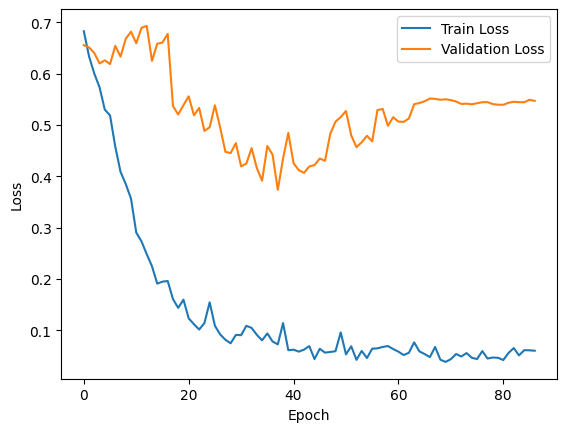

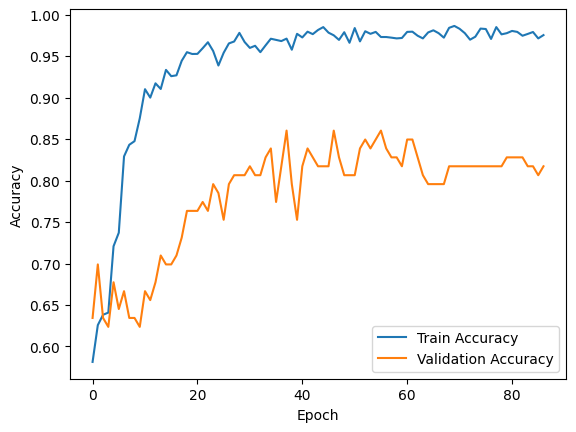

MODEL: mobilenet-v3s-more-params-stratified-kfold DATASET: foggia-unbalanced-ext FOLD: 1


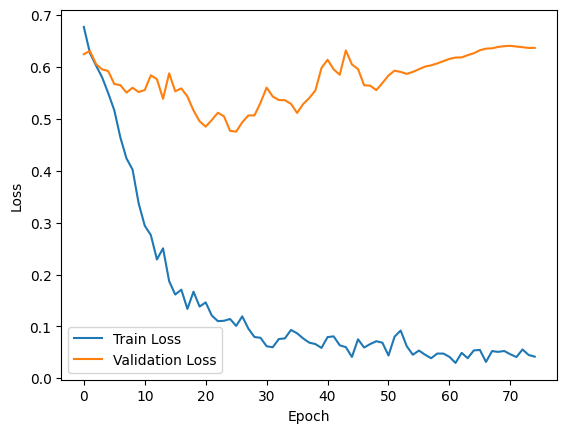

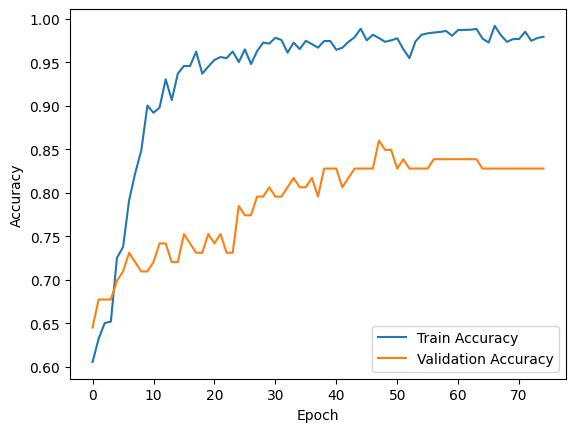

MODEL: mobilenet-v3s-more-params-stratified-kfold DATASET: foggia-unbalanced-ext FOLD: 2


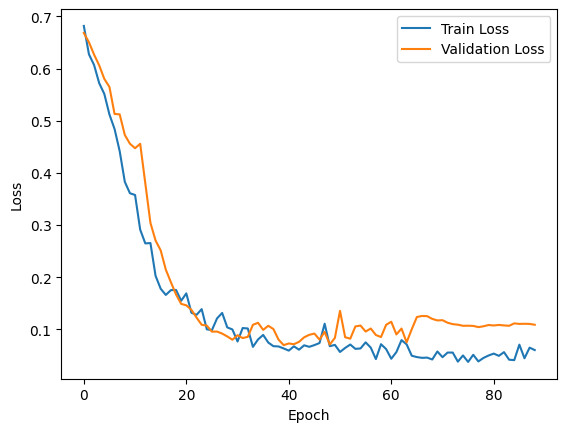

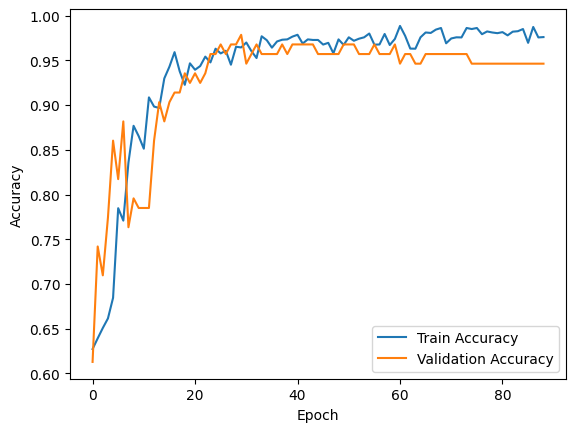

MODEL: mobilenet-v3s-more-params-stratified-kfold DATASET: foggia-unbalanced-ext FOLD: 3


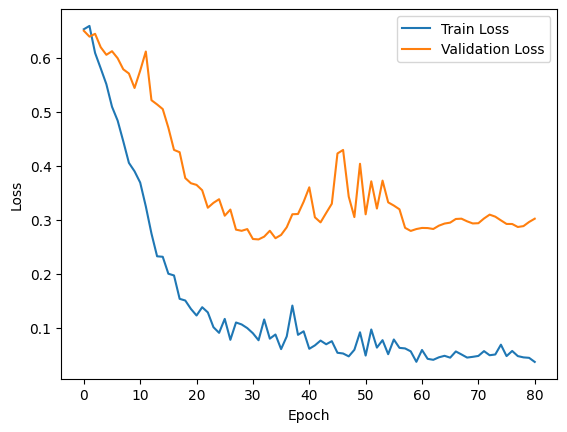

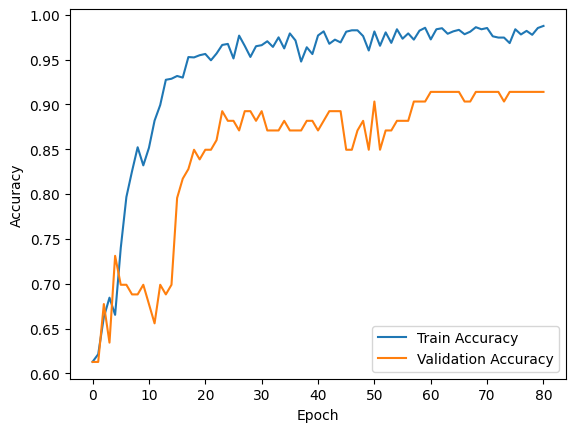

MODEL: mobilenet-v3s-more-params-stratified-kfold DATASET: foggia-unbalanced-ext FOLD: 4


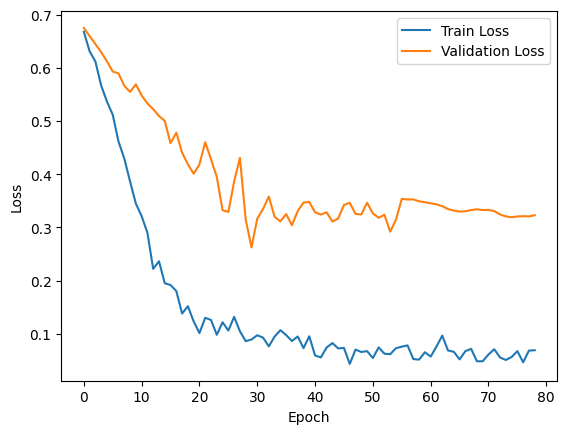

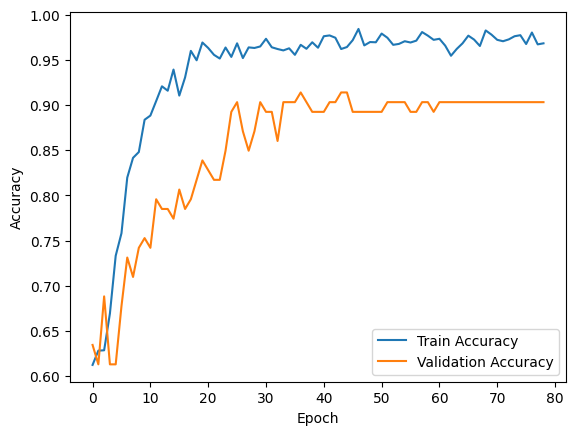

MODEL: mobilenet-v3s-more-params-stratified-kfold DATASET: foggia-unbalanced-ext FOLD: 5


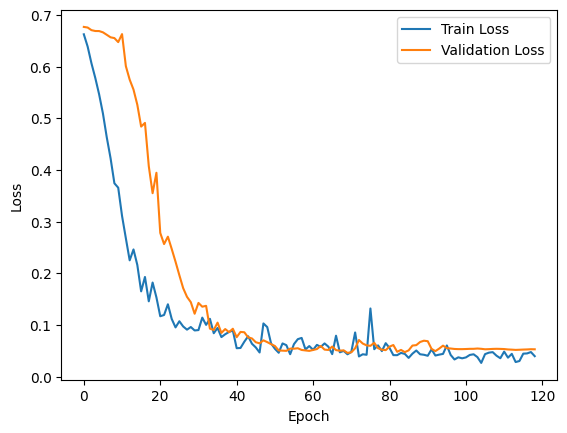

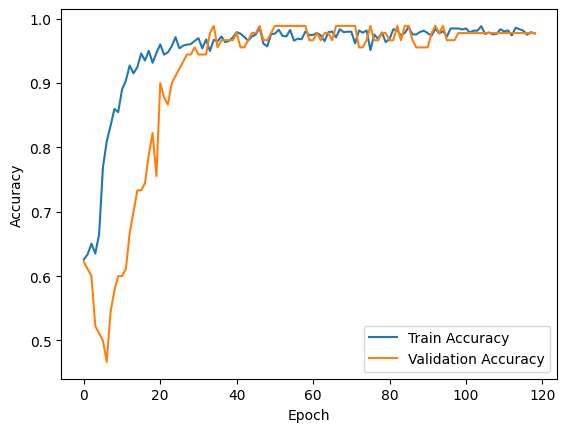

MODEL: mobilenet-v3s-more-params-stratified-kfold DATASET: foggia-unbalanced-ext FOLD: 6


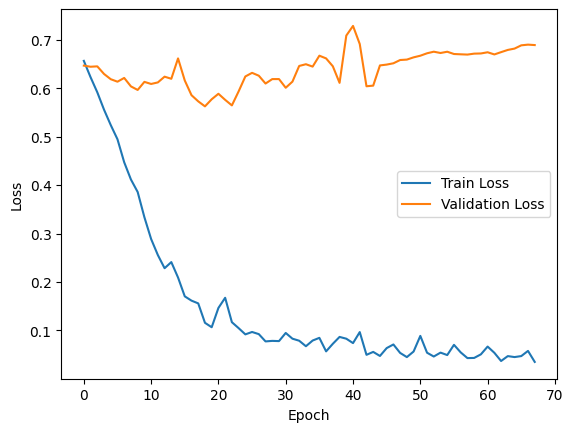

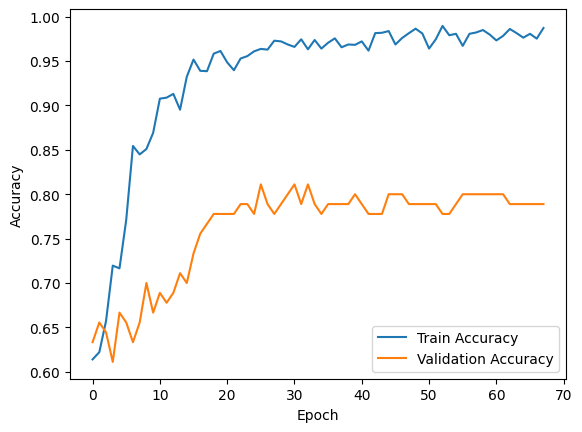

MODEL: mobilenet-v3s-more-params-stratified-kfold DATASET: foggia-unbalanced-ext FOLD: 7


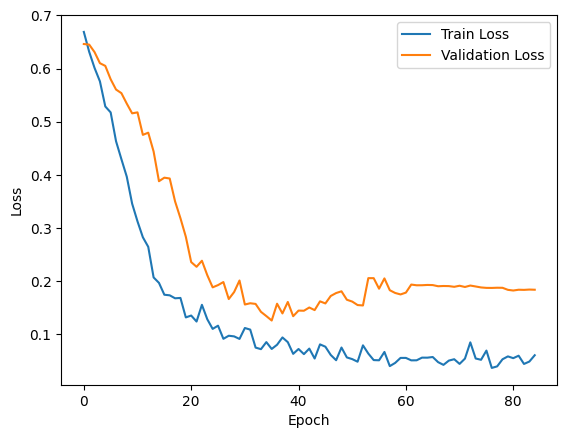

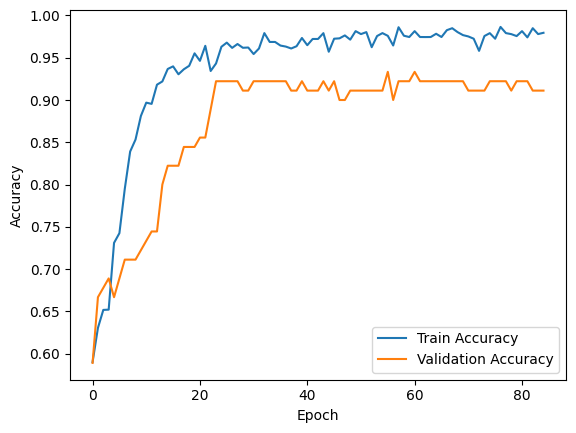

MODEL: mobilenet-v3s-more-params-stratified-kfold DATASET: foggia-unbalanced-ext FOLD: 8


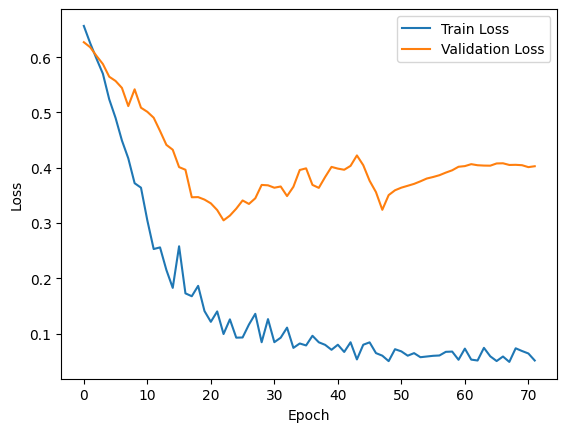

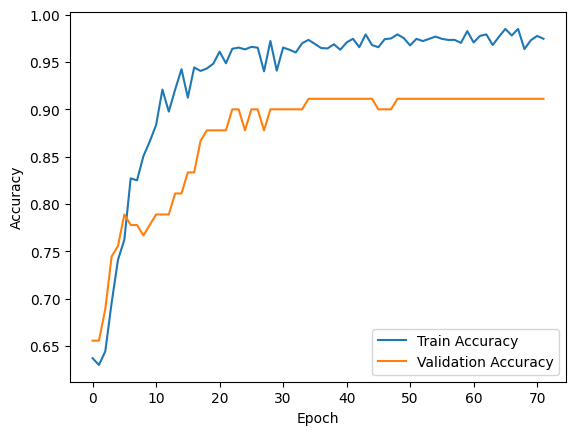

MODEL: mobilenet-v3s-more-params-stratified-kfold DATASET: foggia-unbalanced-ext FOLD: 9


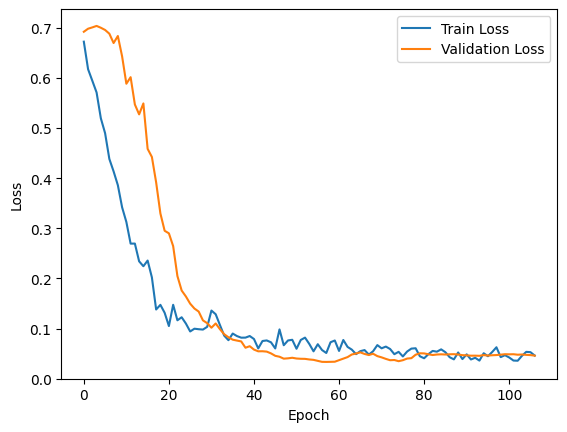

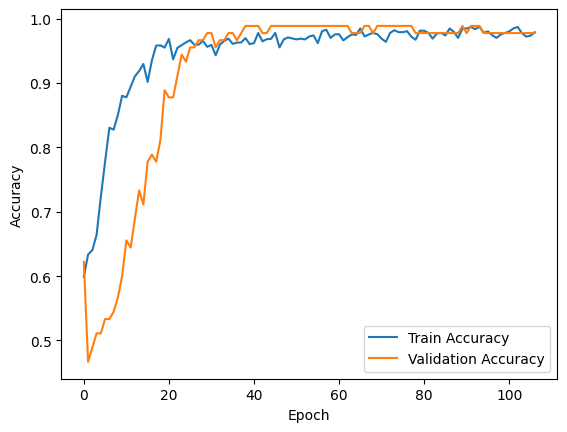

In [ ]:
from utils.training import plot_acc
from utils.training import plot_loss

model = "mobilenet-v3s-more-params-stratified-kfold"
dataset = "foggia-unbalanced-ext"
num_fold = 10

for n in range(10):
    print("MODEL: "+model + " DATASET: "+dataset + " FOLD: "+str(n) )
    path_csv = "experiments/"+model+"/"+dataset+"/fold_"+str(n)+"_training.csv"
#path_csv = "fold_1_training.csv"
    plot_loss(path_csv)
    plot_acc( path_csv)

# Analysis of k-fold results 

## Visualizing folds

This code is used to visualize some of the folds and the corresponding predictions. This is useful to understand if the model is learning something useful or if it is just overfitting.

In [ ]:
from utils.dataset import get_dataset_training_test_modes
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from utils.models import get_config
import importlib
import torch
import os
from torchmetrics import Accuracy
selected_model = "mobilenet-v3l"#"YOLOv8n-cls-bin"
experiment_name = "experiments/mobilenet-v3l-aug/foggia-unbalanced-ext/"#"experiments/YOLOv8n-cls-bin/foggia-unbalanced/"
selected_dataset = "foggia-unbalanced-ext"


model_config = get_config(selected_model)
model_module = importlib.import_module(model_config['module_name'])
ModelClass = getattr(model_module, model_config['class_name'])

preprocessing = model_config['preprocess']

accuracyMetric = Accuracy(task="binary", num_classes=2)
dataset_train_mode, dataset_test_mode = get_dataset_training_test_modes(selected_dataset,preprocessing=preprocessing, debug_mode=True)
split = KFold(n_splits=10, shuffle=True, random_state=np.random.RandomState(seed=5423534)).split(dataset_test_mode)
split = list(split)
#print(split)
selected_kfold_steps_to_print = [5]
for selected_kfold_step in selected_kfold_steps_to_print:
    print(f"KFold step {selected_kfold_step} validation set:")
    val_pred_labels = []
    val_true_labels = []
    
    model = ModelClass(2)
    model.load_state_dict(torch.load(os.path.join(experiment_name, f"fold_{selected_kfold_step}_best_model.pth")))
    model.eval()
    
    training_indices = split[selected_kfold_step][0]
    validation_indices = split[selected_kfold_step][1]
    
    for i in validation_indices:
        X, y = dataset_test_mode[i]
        with torch.no_grad():
            y_pred = model(X).softmax(dim=1).argmax(dim=1)
            y_true = torch.tensor(y[1]).repeat(3)
            print(f"Predicted: {y_pred}")
            print(f"True: {y_true}")
            val_true_labels.append(y_true)
            val_pred_labels.append(y_pred)
        plt.figure()
        plt.imshow(make_grid(X).numpy().transpose((1, 2, 0)))
        plt.title(y)
        plt.show()
    val_true_labels = torch.concatenate(val_true_labels)
    val_pred_labels = torch.concatenate(val_pred_labels)
    val_accuracy = accuracyMetric(val_pred_labels, val_true_labels)
    print(f"Validation accuracy: {val_accuracy}")

## Metrics

This code is used to evaluate some metrics on the kfold

In [ ]:
import pandas as pd
import os
import math
import glob
#experiment_name = "experiments/mobilenet-v3l/foggia-mod/"
#experiment_name = "experiments/resnet50-test/foggia-mod/"

def print_kfold_results(experiment):
    best_models_metrics_path = os.path.join(experiment, "best_models.csv")
    df = pd.read_csv(best_models_metrics_path)
    print(f"Experiment {experiment} results:")
    print("\tMean val_acc:", df["val_acc"].mean())
    print("\tStandard deviation val_acc:", df["val_acc"].std())
    print("\tStandard error:", df["val_acc"].std()/math.sqrt(10))
    print("\tWith 0.95 probability the mean is in the interval:", df["val_acc"].mean()-2*df["val_acc"].std()/math.sqrt(10), df["val_acc"].mean()+2*df["val_acc"].std()/math.sqrt(10))
    return df

df_all = pd.DataFrame()

for experiment in glob.glob("experiments/*/*"):
    
    df = print_kfold_results(experiment)
    val_acc_stats = df.aggregate({"val_acc":['mean', 'std']}).transpose().set_index(pd.Index([experiment]))
    df_all = pd.concat([df_all, val_acc_stats])
    
print("All experiments results:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    pd.set_option('display.max_colwidth', None)
    display(df_all.sort_values(by="std", ascending=True))
        #print_kfold_results(experiment_name)
#print_kfold_results("experiments/resnet50-test-more-params-stratified-kfold/foggia-unbalanced-ext/")


Experiment experiments/mobilenet-v3l-more-params-best/foggia-unbalanced-ext results:
	Mean val_acc: 0.8589247345924378
	Standard deviation val_acc: 0.060471993118824625
	Standard error: 0.019122923290551506
	With 0.95 probability the mean is in the interval: 0.8206788880113348 0.8971705811735408
Experiment experiments/YOLOv8n-cls-bin-lower-batch-size/foggia-unbalanced results:
	Mean val_acc: 0.9144999921321869
	Standard deviation val_acc: 0.04062816963220723
	Standard error: 0.012847755320146028
	With 0.95 probability the mean is in the interval: 0.8888044814918948 0.940195502772479
Experiment experiments/resnet50-test-more-params-stratified-kfold/foggia-unbalanced-ext results:
	Mean val_acc: 0.90960573554039
	Standard deviation val_acc: 0.05391953400102996
	Standard error: 0.01705085378181464
	With 0.95 probability the mean is in the interval: 0.8755040279767607 0.9437074431040193
Experiment experiments/resnet50-test-more-params-stratified-kfold/foggia-unbalanced results:
	Mean val_ac

,mean,std
experiments/YOLOv8n-cls-bin/foggia-unbalanced,0.894444,0.039158
experiments/YOLOv8n-cls-bin-lower-batch-size/foggia-unbalanced,0.914500,0.040628
experiments/resnet50-test-more-params-stratified-kfold/foggia-unbalanced,0.886278,0.049432
experiments/resnet50-test-more-params-stratified-kfold/foggia-unbalanced-ext,0.909606,0.053920
experiments/YOLOv8n-cls-multi/foggia-unbalanced,0.875611,0.054584
experiments/mobilenet-v3l-more-params-multi/foggia-unbalanced-ext,0.865502,0.056640
experiments/mobilenet-v3l-more-params-stratified-kfold/foggia-unbalanced,0.874444,0.056678
experiments/mobilenet-v3l-more-params-stratified-kfold/foggia-unbalanced-ext,0.873477,0.060065
experiments/mobilenet-v3l-more-params-best/foggia-unbalanced-ext,0.858925,0.060472
experiments/mobilenet-v3l/foggia-unbalanced-ext,0.887384,0.064426


In [ ]:
print_kfold_results("experiments/YOLOv8n-cls-bin/foggia-unbalanced-ext/")

In [ ]:
df: pd.DataFrame = print_kfold_results("experiments/mobilenet-v3l/foggia-mod/")
df.sort_values(["fold","val_acc","lr","scheduler"])

In [ ]:
df: pd.DataFrame = print_kfold_results("experiments/mobilenet-v3s-more-params-stratified-kfold/foggia-unbalanced-ext/")
df

In [ ]:
df: pd.DataFrame = print_kfold_results("experiments/mobilenet-v3s/foggia-unbalanced/")
df.sort_values(["fold","val_acc","lr","scheduler"])

In [ ]:
df: pd.DataFrame = print_kfold_results("experiments/mobilenet-v3l-lstm/foggia-unbalanced-ext/")
df.sort_values(["fold","val_acc","lr","scheduler"])

In [ ]:
df: pd.DataFrame = print_kfold_results("experiments/mobilenet-v3l-aug/foggia-unbalanced-ext/")
df.sort_values(["fold","val_acc","lr","scheduler"])

In [ ]:
df1: pd.DataFrame = print_kfold_results("experiments/mobilenet-v3l/foggia-unbalanced/")
df1["Augmentation"] = "No"
#df2: pd.DataFrame = print_kfold_results("experiments/mobilenet-v3l-aug/foggia-unbalanced/")
#df2["Augmentation"] = "Yes"
df3: pd.DataFrame = print_kfold_results("experiments/mobilenet-v3l/foggia-unbalanced-ext/")
df3["Augmentation"] = "No"
df4: pd.DataFrame = print_kfold_results("experiments/mobilenet-v3l-aug/foggia-unbalanced-ext/")
df4["Augmentation"] = "Yes"
pd.concat([df1,df3,df4]).sort_values(["fold","val_acc","lr","scheduler"]).drop(columns=["eps","mode","factor","min_lr","weight_decay"])

# Testing (DA CANCELLARE)

In [ ]:
import torch
from utils.dataset import get_dataset_training_test_modes
from utils.training import collate_function_videos_to_images
from models.yolo_v8_cls import yolov8_cls
from torchmetrics import Accuracy
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.utils.data import Subset
from ultralytics.yolo.data.augment import LetterBox
from utils.models import get_config
import importlib

selected_model = "YOLOv8n-cls-multi"

model_config = get_config(selected_model)
model_module = importlib.import_module(model_config['module_name'])
ModelClass = getattr(model_module, model_config['class_name'])


preprocessing = model_config['preprocess']
augmentation = model_config['augmentation']

print(preprocessing, augmentation)

dataset_train_mode, dataset_test_mode = get_dataset_training_test_modes("foggia-mod", preprocessing=preprocessing, augmentation=augmentation, binary_classification=False)
dataset = Subset(dataset_train_mode, [0, 1, 2, 200, 241, 242, 250, 262, 72, 45])
dataloader = DataLoader(dataset, shuffle=True, batch_size=2, num_workers=1, pin_memory=False, collate_fn=collate_function_videos_to_images(3))
device = torch.device("cpu")
model = ModelClass(classes=2)
#loss_fn = torch.nn.CrossEntropyLoss()
loss_fn = torch.nn.BCEWithLogitsLoss()
model.eval() 



In [ ]:
for batch, (X, y) in enumerate(dataloader):
    if batch <= 1:
        print(X[0].type())
        plt.figure()
        plt.imshow(make_grid(X).numpy().transpose((1, 2, 0)))
        plt.title(y)
        plt.show()

In [ ]:
task = "multilabel"

with torch.inference_mode():
    val_loss = []
    val_pred_labels = []
    val_true_labels = []
    accuracyMetric = Accuracy(task=task, num_labels=2, num_classes=2).to(device)
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)
        # if(batch == 0):
        #     print(X)
        plt.figure()
        plt.imshow(make_grid(X).numpy().transpose((1, 2, 0)))
        plt.title(y)
        plt.show()
        
        # 1. Forward pass
        output_logits = model(X)
        if(output_logits.dim() == 1):
            output_logits = output_logits[None,:] #BUGFIX for a mini-batch of size 1
        print(output_logits)
        # if output_activation is not None:
        #     test_pred_logits = output_activation(test_pred_logits).squeeze()
        
        # # 2. Calculate and accumulate loss
        # loss = loss_fn(output_logits, y)
        # val_loss.append(loss)
        
        # # 3. Calculate and accumulate accuracy
        # if task == "binary":
        #     output_probabilities = torch.nn.Softmax(dim=1)(output_logits) #In a binary classification problem we use softmax
        #     pred_labels = output_probabilities.argmax(dim=1) #The predicted label is the one with the highest probability
        # elif task == "multilabel":
        #     output_probabilities = torch.nn.Sigmoid()(output_logits)
        #     print(output_probabilities)
        #     pred_labels = (output_probabilities > .5).long()
        #     print(pred_labels)
        # else:
        #     raise(Exception(f"task {task} not supported"))
            
        # val_true_labels.append(y)
        # val_pred_labels.append(pred_labels)
    
    # val_true_labels = torch.concatenate(val_true_labels)
    # val_pred_labels = torch.concatenate(val_pred_labels)
    
    # print(val_true_labels)
    # print(val_pred_labels)
    
    # val_loss = torch.stack(val_loss).mean().item()
    #val_accuracy = accuracyMetric(val_pred_labels, val_true_labels)
    
    #print(val_accuracy)

In [ ]:
torch.repeat_interleave(torch.tensor([0,1,1,0,1]), 2, dim=0) #Attacca le label di video diversi

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
cap = cv2.VideoCapture("./datasets/foggia-test/VIDEOS/TRAINING_SET/0/video.mp4")

# frame_to_extract = -1
# i = -2
# while i<frame_to_extract:
#     ret = cap.grab()
#     i+=1

img_to_find = Image.open("datasets/foggia-test/00001.jpg")
img_to_find = np.array(img_to_find)

# ret, frame = cap.read()
# print(ret)
# image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# print(image)

flag = False
i = 0
while flag == False:
    ret, frame = cap.read()
    if ret == False:
        break
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if np.all(image == img_to_find):
        print(i)
    print(i, np.all(image == img_to_find))
    i += 1
        

# plt.figure()
# plt.imshow(img_to_find)
# plt.show()


In [ ]:
#Pipeline training
from utils.dataset import VideoFrameDataset
import matplotlib.pyplot as plt
import albumentations
from albumentations.pytorch import ToTensorV2

preprocessing = albumentations.Compose([
    albumentations.Resize(232,232,interpolation=cv2.INTER_LINEAR),
    albumentations.CenterCrop(224,224),
    albumentations.ToFloat(max_value=255),
    albumentations.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=1.0), 
                        #albumentations.Resize(224, 224), #redimension
                        #albumentations.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=1.0),
])

dataset_test_mode = VideoFrameDataset(root_path=f"datasets/foggia-test/FRAMES/TRAINING_SET/",
                                num_segments=1,
                                frames_per_segment=1,
                                 transform=albumentations.Compose([
                                     preprocessing
                                 ]), #No augmentation here
                                test_mode=True,
                                totensor=True,
                                imagefile_template='{:05d}.png' #!!!
                                )

X,y = next(iter(dataset_test_mode))
#print(X)
#print(len(X))
#print(type(X[0]))
#print(X)
print(X.shape)

# plt.figure()
# plt.imshow(X[0])
# plt.show()

In [ ]:
#Pipeline inferenza
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
cap = cv2.VideoCapture("datasets/foggia-test/VIDEOS/TRAINING_SET/0/video.mp4")
preprocessing2 = albumentations.Compose([preprocessing, ToTensorV2()])
# frame_to_extract = -1
# i = -2
# while i<frame_to_extract:
#     ret = cap.grab()
#     i+=1

ret, frame = cap.read()
#print(ret)
image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#print(image)
augmented = preprocessing2(image=image)
image = augmented['image']
image = torch.unsqueeze(image, 0)
print(image.shape)

In [ ]:
from torch import nn
from torchvision.models import mobilenet_v3_small

mobilenet = mobilenet_v3_small(pretrained=True)
num_ftrs: int = mobilenet.classifier[-1].in_features
mobilenet

In [ ]:
from torch import nn
from models.mobilenet_v3_small import mobilenet_v3s

mobilenet = mobilenet_v3s(classes=2)
mobilenet

In [ ]:
from utils.prepare_datasets import extract_frames

videos_path = f"TRAINING_SET"
frames_path = f"FRAMES"
extract_frames("foggia", videos_path, frames_path)

In [ ]:
from models.kutralnet import KutralNet
from torch import nn

kutralnet = KutralNet(2, initial_filters=32)
kutralnet.load_state_dict(torch.load("models/saved/kutralnet/fismo_balanced_black/model_kutralnet.pth", map_location=torch.device('cuda')))
kutralnet.classifier = nn.Linear(kutralnet.classifier.in_features, 2)
for a,b in kutralnet.named_parameters():
    print (a,b.requires_grad)
    
#Freeze all layers except the last two (the last two linear layer in classifier)
for name, param in kutralnet.named_parameters():
    if not "classifier" in name:
        param.requires_grad = False
        
for a,b in kutralnet.named_parameters():
    print ("\n",a,b.requires_grad)